
Logistic Regression:
Accuracy = 0.500
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.75      0.60      0.67         5

    accuracy                           0.50         6
   macro avg       0.38      0.30      0.33         6
weighted avg       0.62      0.50      0.56         6


Decision Tree:
Accuracy = 0.833
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.83      1.00      0.91         5

    accuracy                           0.83         6
   macro avg       0.42      0.50      0.45         6
weighted avg       0.69      0.83      0.76         6


Random Forest:
Accuracy = 0.833
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.83      1.00      0.91         5

    accuracy                           0.83         6
   macro avg       0.42

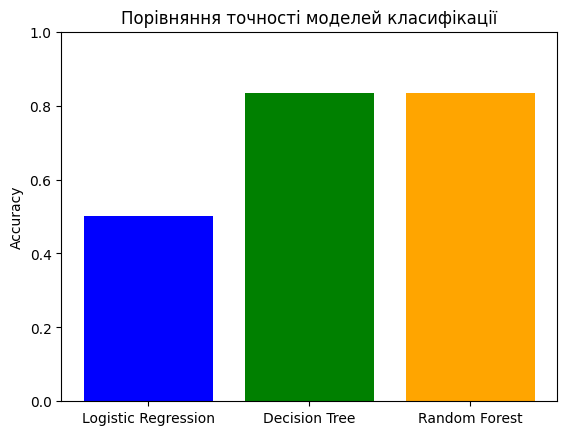

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# 1. Завантаження даних
df = pd.read_csv("Top_20_Pakistani_Universities.csv")

# 2. Перетворення QS Ranking (Asia) у числовий формат
def parse_rank(value):
    try:
        if isinstance(value, str) and "-" in value:
            parts = value.split("-")
            return (int(parts[0]) + int(parts[1])) / 2   # середнє значення діапазону
        else:
            return float(value)
    except:
        return None

df['QS_Ranking_Asia_Numeric'] = df['QS Ranking (Asia)'].apply(parse_rank)

# 3. Перетворення цільової змінної (Public / Private)
df['Type_num'] = df['University Type'].map({'Public': 1, 'Private': 0})

# 4. Вибір ознак для моделі
features = ['Rank', 'Total Students', 'Total Faculty', 'Campus Area (Acres)', 'QS_Ranking_Asia_Numeric']
X = df[features]
y = df['Type_num']

# 5. Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 6. Список моделей
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, class_weight='balanced'),
    "Decision Tree": DecisionTreeClassifier(max_depth=4, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

# 7. Навчання та оцінка
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results.append([name, acc])
    print(f"\n{name}:\nAccuracy = {acc:.3f}")
    print(classification_report(y_test, y_pred, zero_division=0))

# 8. Таблиця результатів
results_df = pd.DataFrame(results, columns=["Модель", "Accuracy"])
print("\nПорівняння моделей:")
print(results_df)

# 9. Візуалізація точності
plt.bar(results_df["Модель"], results_df["Accuracy"], color=['blue','green','orange'])
plt.title("Порівняння точності моделей класифікації")
plt.ylabel("Accuracy")
plt.ylim(0,1)
plt.show()
